Course: INF2178

Assignment: Assignment 4

Name: Ruiying Wang

Student number: 1003059762

In [10]:
!pip install pingouin

In [11]:
import pandas as pd
import seaborn as sns
import pingouin as pg
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.stats.power as smp
import scipy.stats as stats

In [12]:
df = pd.read_csv("INF2178_A4_data.csv",index_col='Unnamed: 0')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


**Exploratary Data Analysis**

In [13]:
#Check column type and non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 371
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  294 non-null    object 
 1   MRI ID      294 non-null    object 
 2   Group       294 non-null    object 
 3   Visit       294 non-null    int64  
 4   MR Delay    294 non-null    int64  
 5   M/F         294 non-null    object 
 6   Hand        294 non-null    object 
 7   Age         294 non-null    int64  
 8   EDUC        294 non-null    int64  
 9   SES         279 non-null    float64
 10  MMSE        293 non-null    float64
 11  CDR         294 non-null    float64
 12  eTIV        294 non-null    int64  
 13  nWBV        294 non-null    float64
 14  ASF         294 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 36.8+ KB


In [14]:
# Numerical column summary statistics
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,294.000000,294.000000,294.000000,294.000000,279.000000,293.000000,294.000000,294.000000,294.000000,294.000000
mean,1.489796,349.785714,76.411565,14.561224,2.491039,27.259386,0.301020,1478.853741,0.731381,1.203109
std,0.500748,400.741520,7.607074,2.884818,1.128008,3.413454,0.381347,176.559755,0.037373,0.139365
min,1.000000,0.000000,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,26.000000,0.000000,1347.250000,0.703000,1.118250
50%,1.000000,0.000000,76.000000,14.500000,2.000000,29.000000,0.000000,1461.500000,0.732000,1.201000
75%,2.000000,671.500000,81.000000,16.000000,3.000000,30.000000,0.500000,1569.000000,0.756000,1.302750
max,2.000000,1707.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [15]:
# Filter columns with object data type
object_columns = df.select_dtypes(include='object').columns

# Count unique categories in each object column
unique_categories = {col: df[col].nunique() for col in object_columns}
unique_categories

{'Subject ID': 150, 'MRI ID': 294, 'Group': 3, 'M/F': 2, 'Hand': 1}

In [16]:
# Get unique values for each column
unique_visit = df['Visit'].unique()
unique_group = df['Group'].unique()
unique_mf = df['M/F'].unique()
unique_hand = df['Hand'].unique()

# Print the unique values
print("Unique values in 'Visit':", unique_visit)
print("Unique values in 'Group':", unique_group)
print("Unique values in 'M/F':", unique_mf)
print("Unique values in 'hand':", unique_hand)

Unique values in 'Visit': [1 2]
Unique values in 'Group': ['Nondemented' 'Demented' 'Converted']
Unique values in 'M/F': ['M' 'F']
Unique values in 'hand': ['R']


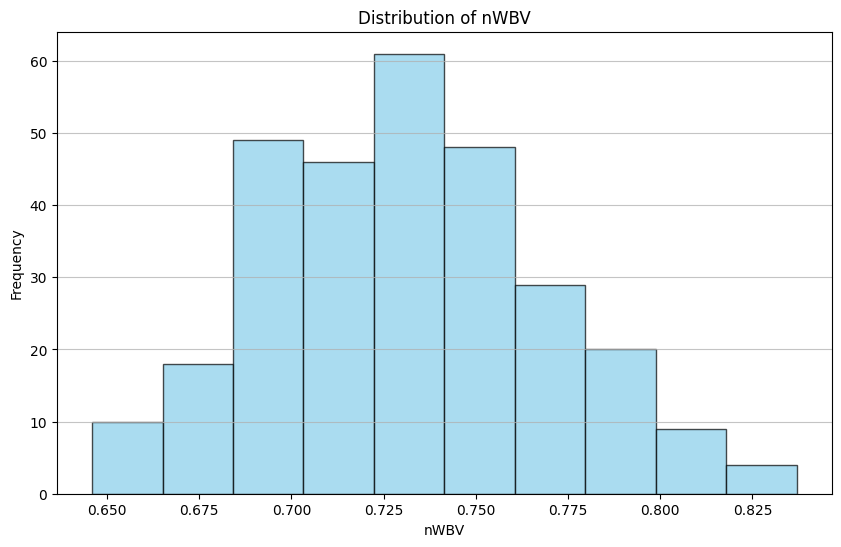

In [17]:
#Plot distribution of nWBV
plt.figure(figsize=(10, 6))
plt.hist(df['nWBV'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('nWBV')
plt.ylabel('Frequency')
plt.title('Distribution of nWBV')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Research question 1:** If the change of nWBC from Visit 1 to Visit 2 differs depending on the group

*   Dependent variable: nWBV
*   Within subject factor: Visit
*   Between subject factor: Group

<ipython-input-18-78d8e08ad07c>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Visit',y='nWBV',hue='Group',dodge=True,capsize=.1, errwidth=1, palette='colorblind')


<Axes: xlabel='Visit', ylabel='nWBV'>

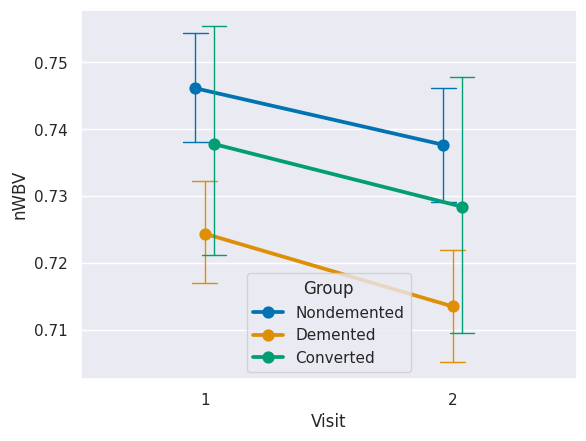

In [18]:
sns.set()
sns.pointplot(data=df, x='Visit',y='nWBV',hue='Group',dodge=True,capsize=.1, errwidth=1, palette='colorblind')

In [19]:
df.groupby(['Visit','Group'])['nWBV'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                  
1     Converted    0.74  0.03
      Demented     0.72  0.03
      Nondemented  0.75  0.04
2     Converted    0.73  0.04
      Demented     0.71  0.03
      Nondemented  0.74  0.04

In [20]:
# Compute the two-way mixed ANOVA
aov = pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.034      2    141  0.017   6.712    0.002  0.087  nan
Visit        0.007      1    141  0.007  94.251    0.000  0.401    1.000
Interaction  0.000      2    141  0.000   1.534    0.219  0.021  nan



In [32]:
# Posthoc test
posthocs = pg.pairwise_tests(dv='nWBV', within='Visit', between='Group',
                              subject='Subject ID', data=df)
pg.print_table(posthocs)


POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                 BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  -------------------  --------
Visit          -        1          2            True      True           9.672  143.000  two-sided        0.000  225800000000000.000     0.255
Group          -        Converted  Demented     False     True           1.401   14.676  two-sided        0.182                0.668     0.469
Group          -        Converted  Nondemented  False     True          -0.648   15.832  two-sided        0.527                0.361    -0.188
Group          -        Demented   Nondemented  False     True          -3.690  129.436  two-sided        0.000               75.094    -0.633
Visit * Group  1        Converted  Demented     False     True           1.444   14.626  two-sided        0.170              

In [22]:
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower

# Parameters for the power analysis
effect_size = 0.7
alpha = 0.05
power = 0.91

# Power Analysis
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

print(f"\nRequired sample size per group: {sample_size:.2f}")


Required sample size per group: 45.45


In [41]:
# Count the number of subjects in each group
group_counts = df['Group'].value_counts()
visit_counts = df['Visit'].value_counts()

# Print the results
print(group_counts)
print("\n", visit_counts)

Group
Nondemented    142
Demented       126
Converted       26
Name: count, dtype: int64

 Visit
1    150
2    144
Name: count, dtype: int64


**Assumption Check**

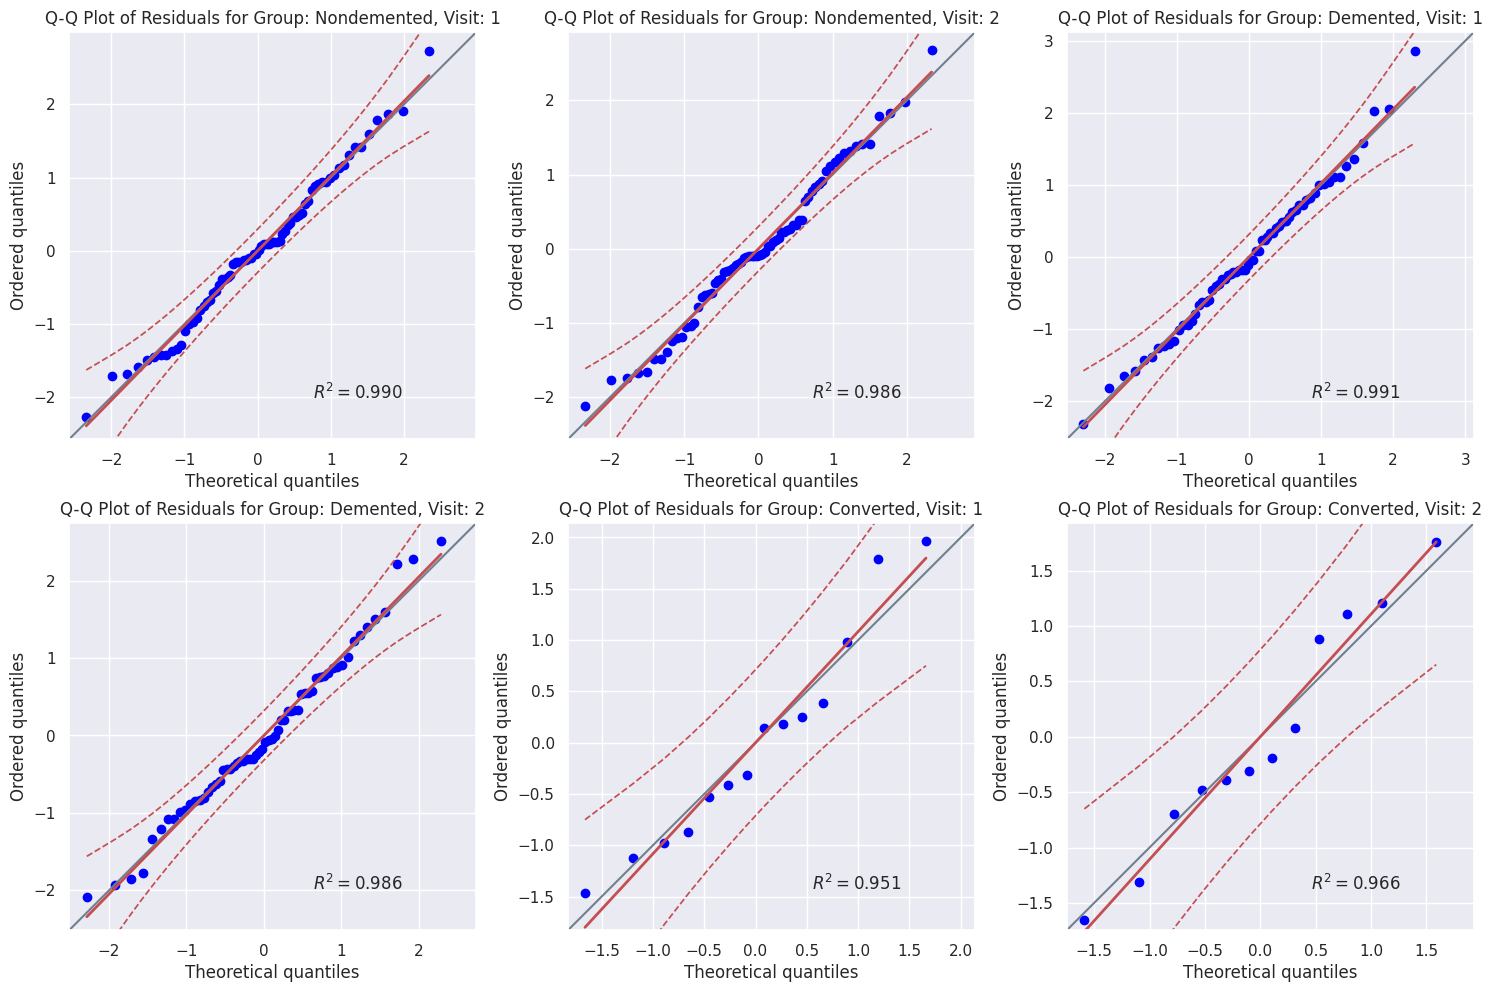

In [42]:
# Assumption 5: Normal distribution of residuals
# Define the unique groups and visits for iteration
groups = df['Group'].unique()
visits = df['Visit'].unique()

# Determine the number of rows needed for the subplot grid
num_rows = int(np.ceil(len(groups) * len(visits) / 3))

# Create a figure object and define the grid layout
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Counter for the current plot
plot_counter = 0

# Generate Q-Q plots for each combination of group and visit
for group in groups:
    for visit in visits:
        residuals = df.loc[(df['Group'] == group) & (df['Visit'] == visit), 'residuals']
        pg.qqplot(residuals, dist='norm', ax=axes_flat[plot_counter])
        axes_flat[plot_counter].set_title(f'Q-Q Plot of Residuals for Group: {group}, Visit: {visit}')
        plot_counter += 1

# Hide any unused subplots if there are any
for i in range(plot_counter, len(axes_flat)):
    fig.delaxes(axes_flat[i])

# Adjust layout for better spacing and display the plot
plt.tight_layout()
plt.show()

In [24]:
#Assumption 6: Homogeneity of variances
# Create a new column that combines 'Group' and 'Visit'
df['Group_Visit'] = df['Group'] + '_' + df['Visit'].astype(str)

# Check homogeneity of variances using Levene's test
levene = pg.homoscedasticity(df, dv='residuals', group='Group_Visit')
print("Levene's Test:\n", levene)

Levene's Test:
                W      pval  equal_var
levene  0.530546  0.753099       True
